# Fundamental Concepts Review

Importing necessary libraries and loading the example dataset. 

This fictitious dataset contains the average height (in centimeters) of undergrad students, as well as categorical information about age and if they drink coffee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.titleweight']= 'bold'

np.random.seed(42)

df_full = pd.read_csv('undergrad_students.csv')
df_full.head(3)

,user_id,age,drinks_coffee,height
0,4509,<21,False,163.93
1,1864,>=21,True,167.19
2,2060,<21,False,181.15


## Law of Large Numbers
>Bigger sample size will result in a *statistic* that more closely represents the Population *parameter*.

This can be demonstrated by comparing the Population Parameter - average height ($\mu$) - against the Sample Statistic - average height $\bar X$.

Let's assume:
+ the full dataset, `df_full`, represents the Population.
+  different samples, randomly selected from the full dataset, using specific sample sizes.

In [2]:
population_mean = df_full.height.mean()

print(f'Population Avg Height: {population_mean:.3f} cm')
print(f'Population Size: {len(df_full):,}')

Population Avg Height: 171.698 cm
Population Size: 2,974


In [3]:
# Different sizes, from 3 to 2974, with increments of 10
sizes = range(3,len(df_full),10)

# Random sampling, for all different sample sizes
avg_heights = [df_full.sample(size).height.mean() for size in sizes]

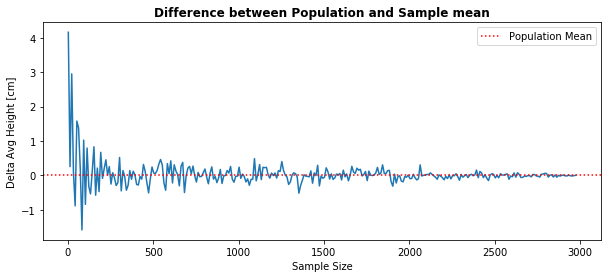

In [4]:
# Plotting
plt.figure(figsize=(10,4))
plt.plot(sizes, population_mean - avg_heights)
plt.axhline(0, color='r', linestyle=':', label='Population Mean')
plt.title('Difference between Population and Sample mean')
plt.xlabel('Sample Size')
plt.ylabel('Delta Avg Height [cm]')
plt.legend();

As stated on the **Law of Large Numbers**, we verify that larger samples yield an estimated statistic closer to the "actual value" (population parameter). That is, the difference between the Population and Sample average height converges to zero.

# Central Limit Theory
>With a large enough sample size, the sampling distribution of specific statistics will be normally distributed around the mean value.

This applies to some, but not all statistics: mean, proportion, difference in means, difference in proportions.

Similar to what we have done before, this can be demonstrated by generating sampling distributions based on different sample sizes. 

But first, what is  a "sampling distribution" and how can we obtain one?

+ **Sampling Distribution**: shows the frequency of every possible result a statistic can take in *every* possible sample from a population.

+ **Bootstrapping**: Estimate the Sampling Distribution of any statistic by constructing a number of resamples with replacement of the observed dataset (and of equal size to the observed dataset).

It will make more sense once put in practice:

In [5]:
# From the original dataset, take a small sample of size 50
df_sample_50 = df_full.sample(50)

# Generate Sampling Distribution with 100 resamples
resampling_100 = np.random.choice(df_sample_50.height, (100, 50)).mean(axis=1)

# Generate Sampling Distribution with 1,000 resamples
resampling_1000 = np.random.choice(df_sample_50.height, (1_000, 50)).mean(axis=1)

# Generate Sampling Distribution with 10,000 resamples
resampling_10000 = np.random.choice(df_sample_50.height, (10_000, 50)).mean(axis=1)

# Generate Sampling Distribution with 80,000 resamples
resampling_80000 = np.random.choice(df_sample_50.height, (80_000, 50)).mean(axis=1)

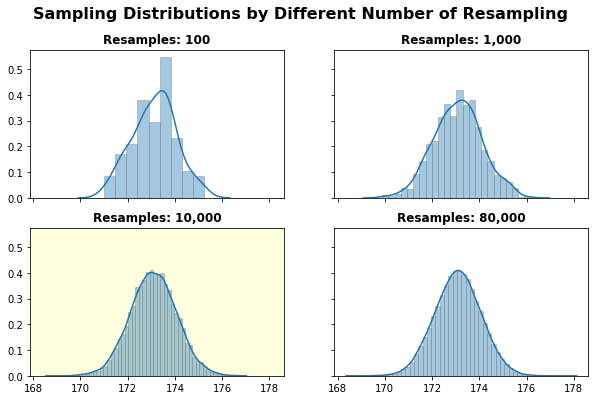

In [6]:
# Plotting it all together, with same x and y axis
fig, axes = plt.subplots(2,2, sharey=True, sharex=True, figsize=(10,6))
fig.suptitle('Sampling Distributions by Different Number of Resampling',
            fontweight='bold', fontsize=16)

sns.distplot(resampling_100, ax=axes[0,0], hist_kws={'edgecolor':'gray'})
axes[0,0].set_title('Resamples: 100')

sns.distplot(resampling_1000, ax=axes[0,1], hist_kws={'edgecolor':'gray'})
axes[0,1].set_title('Resamples: 1,000')

sns.distplot(resampling_10000, ax=axes[1,0], hist_kws={'edgecolor':'gray'})
axes[1,0].set_title('Resamples: 10,000')
axes[1,0].set_facecolor('lightyellow') # Highlighting

sns.distplot(resampling_80000, ax=axes[1,1], hist_kws={'edgecolor':'gray'})
axes[1,1].set_title('Resamples: 80,000');

As stated by the **Central Limit Theory**, we can verify that a larger amount of resampling will indeed lead to a normal distribution, centered around the mean value. As a matter of fact, the highlighted plot - with *10,000 repetitions* - seems to result in a "good enough" normal.

## Law of Large Numbers + Central Limit Theory
We just verified that 10,000 resampling yields a "good enough" normal distribution. It is only natural now to combine the best of both concepts, having a normal distribution based on a sample "big enough" to result in an accurate estimator for the Population Parameter.

Let's investigate this by replicating the 10,000 resampling based on initial samples of different sizes:

In [7]:
# From the original dataset, take different sample sizes
df_sample_50 = df_full.sample(50)
df_sample_100 = df_full.sample(100)
df_sample_200 = df_full.sample(200)
df_sample_1000 = df_full.sample(1000)

# Bootstrap for each sample, replicating 10,000 times
bootstrap_50   = np.random.choice(df_sample_50.height,   (10_000, 50)).mean(axis=1)
bootstrap_100  = np.random.choice(df_sample_100.height,  (10_000, 100)).mean(axis=1)
bootstrap_200  = np.random.choice(df_sample_200.height,  (10_000, 200)).mean(axis=1)
bootstrap_1000 = np.random.choice(df_sample_1000.height, (10_000, 1000)).mean(axis=1)

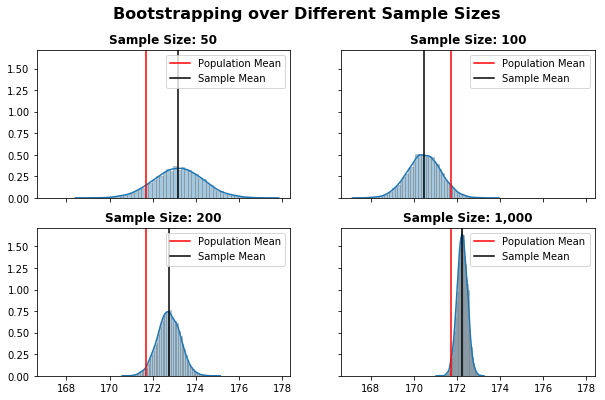

In [8]:
# Plotting it all together, with same x and y axis
fig, axes = plt.subplots(2,2, sharey=True, sharex=True, figsize=(10,6))
fig.suptitle('Bootstrapping over Different Sample Sizes',
            fontweight='bold', fontsize=16)

sns.distplot(bootstrap_50, ax=axes[0,0], hist_kws={'edgecolor':'gray'})
axes[0,0].set_title('Sample Size: 50')
axes[0,0].axvline(population_mean, color='r', label='Population Mean')
axes[0,0].axvline(bootstrap_50.mean(), color='k', label='Sample Mean')
axes[0,0].legend()

sns.distplot(bootstrap_100, ax=axes[0,1], hist_kws={'edgecolor':'gray'})
axes[0,1].set_title('Sample Size: 100')
axes[0,1].axvline(population_mean, color='r', label='Population Mean')
axes[0,1].axvline(bootstrap_100.mean(), color='k', label='Sample Mean')
axes[0,1].legend()

sns.distplot(bootstrap_200, ax=axes[1,0], hist_kws={'edgecolor':'gray'})
axes[1,0].set_title('Sample Size: 200')
axes[1,0].axvline(population_mean, color='r', label='Population Mean')
axes[1,0].axvline(bootstrap_200.mean(), color='k', label='Sample Mean')
axes[1,0].legend()
# axes[1,0].set_facecolor('lightyellow') # Highlighting

sns.distplot(bootstrap_1000, ax=axes[1,1], hist_kws={'edgecolor':'gray'})
axes[1,1].set_title('Sample Size: 1,000')
axes[1,1].axvline(population_mean, color='r', label='Population Mean')
axes[1,1].axvline(bootstrap_1000.mean(), color='k', label='Sample Mean')
axes[1,1].legend();

As expected, with 10,000 resamples the **Central Limit Theory** "kicks-in", resulting in Normally Distributed sampling distributions.

Also, due to the **Law of Large Numbers**, larger sample sizes results in a more accurate estimate of the Population Parameter. We can see that, as the sample size increases:
+ the difference between the means decrease
+ the Confidence Interval width decrease

Meaning we become more confident of estimating the correct value.

# Main Takeaway
By combining both concepts, we can obtain a pretty accurate estimate of the population parameter - even based on a small sample size, such as 200 observations. As long as we resample it 10,000 times.

Hence, these are the reference values arbitrarily specified for our practical approach of inferential statistics, both for Confidence Interval and Hypothesis Testing.